Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

In [98]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Function to download the data from the given URL
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to download the data.")
        return None

# Function to process the data and extract required attributes
def process_data(data):
    structured_data = []
    for pokemon in data['pokemon']:
        structured_data.append({
            'ID': int(pokemon['id']),
            'Number': int(pokemon['num']),
            'Name': pokemon['name'],
            'Image URL': pokemon['img'],
            'Type': ', '.join(pokemon['type']),
            'Height':float(pokemon['height'].replace(" m","")),
            'Weight':float(pokemon['weight'].replace(" kg","")),
            'Candy': pokemon['candy'],
            'Candy Count': int(pokemon.get('candy_count', 0)),
            'Egg': [float(item['egg'].replace(item['egg'],"0")) if item['egg']=="Not in Eggs" or item['egg']=="Omanyte Candy" 
                       else float(item['egg'].replace(" km","")) for item in data['pokemon']],
            'Spawn Chance': float(pokemon.get('spawn_chance', 0)),
            'Average Spawns': int(pokemon.get('avg_spawns', 0)),
            'Spawn Time': pokemon.get('spawn_time', ''),
            'Weaknesses': ', '.join(pokemon.get('weaknesses', [])),
            'Next Evolution': ', '.join([evolution['name'] for evolution in pokemon.get('next_evolution', [])]),
            'Previous Evolution': ', '.join([evolution['name'] for evolution in pokemon.get('prev_evolution', [])])
        })

    return structured_data

In [99]:
data_url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

data = download_data(data_url)

if data is not None:
    structured_data = process_data(data)
    #analyze_data(structured_data)

In [100]:
df = pd.DataFrame(structured_data)

In [101]:
df.head()

,ID,Number,Name,Image URL,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Average Spawns,Spawn Time,Weaknesses,Next Evolution,Previous Evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71,6.9,Bulbasaur Candy,25,"[2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, ...",0.690,69,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99,13.0,Bulbasaur Candy,100,"[2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, ...",0.042,4,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01,100.0,Bulbasaur Candy,0,"[2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, ...",0.017,1,11:30,"Fire, Ice, Flying, Psychic",,"Bulbasaur, Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25,"[2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, ...",0.253,25,08:45,"Water, Ground, Rock","Charmeleon, Charizard",
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100,"[2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, ...",0.012,1,19:00,"Water, Ground, Rock",Charizard,Charmander


In [102]:
# Get all Pokemons whose spawn rate is less than 5%
print("1) Get all Pokemons whose spawn rate is less than 5%")
spawn_rate_threshold = 0.05
spawn_rate_less_than_threshold = df[['ID','Name','Spawn Chance']][df['Spawn Chance'] < spawn_rate_threshold]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_threshold)
print("Here {} Pokemons that spawn rate less than 5%\n".format(len(spawn_rate_less_than_threshold["Spawn Chance"])))


1) Get all Pokemons whose spawn rate is less than 5%
Pokemons with spawn rate less than 5%:
      ID        Name  Spawn Chance
1      2     Ivysaur        0.0420
2      3    Venusaur        0.0170
4      5  Charmeleon        0.0120
5      6   Charizard        0.0031
7      8   Wartortle        0.0340
..   ...         ...           ...
145  146     Moltres        0.0000
147  148   Dragonair        0.0200
148  149   Dragonite        0.0011
149  150      Mewtwo        0.0000
150  151         Mew        0.0000

[65 rows x 3 columns]
Here 65 Pokemons that spawn rate less than 5%



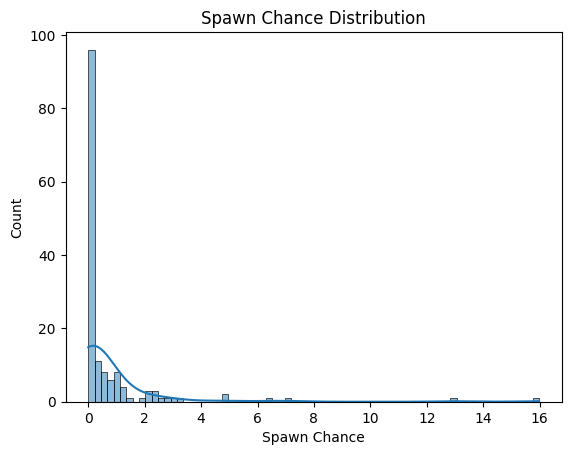

Distribution of spawn chance of pokemon


In [103]:
import seaborn as sns

# Spawn chance analysis
spawn_chances = df['Spawn Chance']

# Distribution plot
sns.histplot(spawn_chances, kde=True)
plt.xlabel('Spawn Chance')
plt.ylabel('Count')
plt.title('Spawn Chance Distribution')

plt.show()
print("Distribution of spawn chance of pokemon")

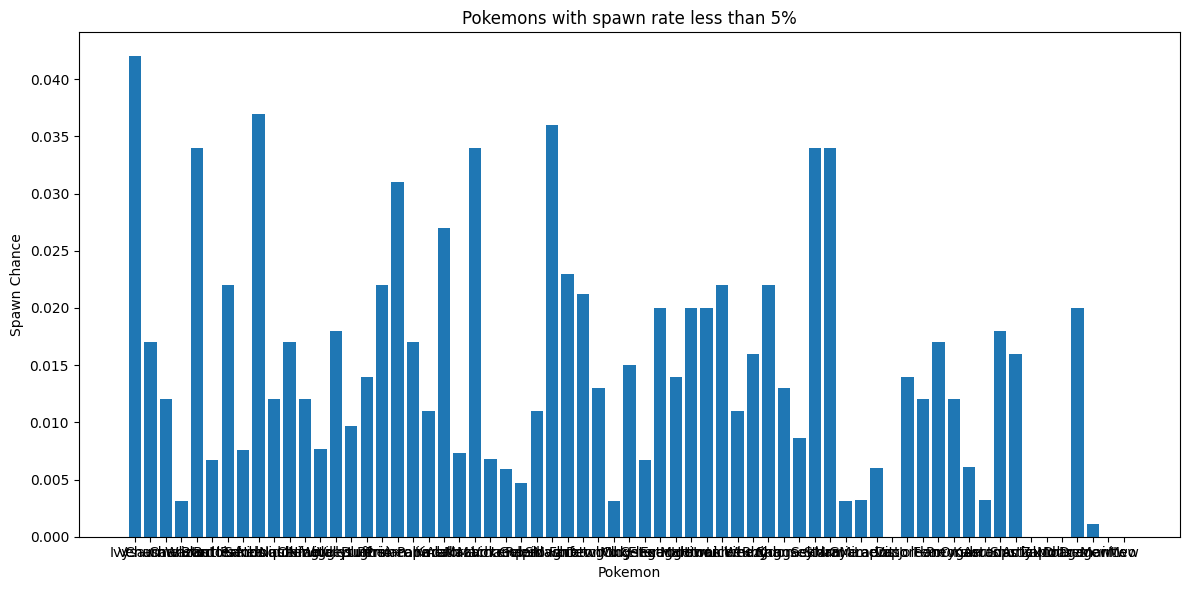

In [104]:
plt.figure(figsize=(12, 6))
plt.bar(spawn_rate_less_than_threshold['Name'], spawn_rate_less_than_threshold['Spawn Chance'],)
plt.xlabel('Pokemon')
plt.ylabel('Spawn Chance')
plt.title('Pokemons with spawn rate less than 5%')
plt.tight_layout()
plt.show()

In [105]:
# Get all Pokemons that have less than 4 weaknesses
print("2) Get all Pokemons that have less than 4 weaknesses")
weaknesses_threshold = 4
less_than_4_weaknesses = df[['ID','Name','Weaknesses']][df['Weaknesses'].str.count(',') < weaknesses_threshold-1]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses)
print("Here {} Pokemons that less than 4 weaknesses\n".format(len(less_than_4_weaknesses["Weaknesses"])))


2) Get all Pokemons that have less than 4 weaknesses
Pokemons with less than 4 weaknesses:
      ID        Name             Weaknesses
3      4  Charmander    Water, Ground, Rock
4      5  Charmeleon    Water, Ground, Rock
5      6   Charizard  Water, Electric, Rock
6      7    Squirtle        Electric, Grass
7      8   Wartortle        Electric, Grass
..   ...         ...                    ...
145  146     Moltres  Water, Electric, Rock
146  147     Dratini     Ice, Dragon, Fairy
147  148   Dragonair     Ice, Dragon, Fairy
149  150      Mewtwo       Bug, Ghost, Dark
150  151         Mew       Bug, Ghost, Dark

[102 rows x 3 columns]
Here 102 Pokemons that less than 4 weaknesses



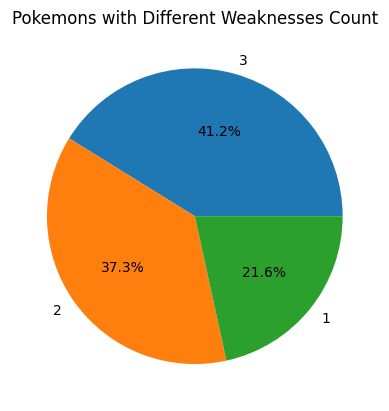

In [106]:
weaknesses_counts = less_than_4_weaknesses['Weaknesses'].str.count(',') + 1

# Counting the occurrences of each weakness count
weaknesses_count_dict = {}
for count in weaknesses_counts:
    weaknesses_count_dict[count] = weaknesses_count_dict.get(count, 0) + 1

# Pie plot
labels = weaknesses_count_dict.keys()
counts = weaknesses_count_dict.values()

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pokemons with Different Weaknesses Count')

plt.show()

Conclusion:  above Pie plot represent the distribution of weakness in our data 

In [107]:
# Get all Pokemons that have no multipliers at all
print("3)  Get all Pokemons that have no multipliers at all")
no_multipliers = df[['Name','Candy Count']][df['Candy Count'] == 0]
print("Pokemons with no multipliers:")
print(no_multipliers)
print("Here {} Pokemons that no multipliers at all\n".format(len(no_multipliers["Candy Count"])))


3)  Get all Pokemons that have no multipliers at all
Pokemons with no multipliers:
           Name  Candy Count
2      Venusaur            0
5     Charizard            0
8     Blastoise            0
11   Butterfree            0
14     Beedrill            0
..          ...          ...
144      Zapdos            0
145     Moltres            0
148   Dragonite            0
149      Mewtwo            0
150         Mew            0

[81 rows x 2 columns]
Here 81 Pokemons that no multipliers at all



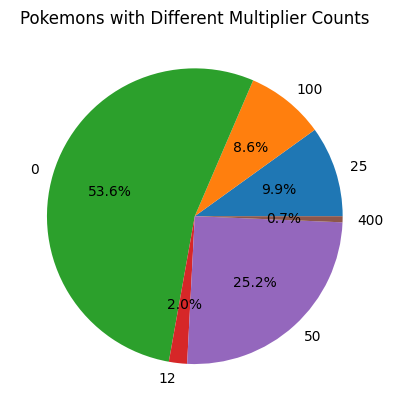

 Here we can see that the multiplier analysis of pokemons and also percentage of no multiplier pokemons in data is 53.6


In [108]:

# Multipliers analysis
multipliers_counts = df['Candy Count']

# Counting the occurrences of each multiplier count
multipliers_count_dict = {}
for count in multipliers_counts:
    multipliers_count_dict[count] = multipliers_count_dict.get(count, 0) + 1

# Pie plot
labels = multipliers_count_dict.keys()
counts = multipliers_count_dict.values()

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pokemons with Different Multiplier Counts')

plt.show()
print(" Here we can see that the multiplier analysis of pokemons and also percentage of no multiplier pokemons in data is 53.6")

In [109]:
# Get all Pokemons that do not have more than 2 evolutions
print("4) Get all Pokemons that do not have more than 2 evolutions")
max_evolutions = 2
less_than_2_evolutions = df[['Name','Next Evolution']][df['Next Evolution'].str.count(',') < max_evolutions]
print("Pokemons with less than 2 evolutions:")
print(less_than_2_evolutions)
print("Here {} Pokemons that do not have more than 2 evolutions\n".format(len(less_than_2_evolutions["Name"])))


4) Get all Pokemons that do not have more than 2 evolutions
Pokemons with less than 2 evolutions:
           Name         Next Evolution
0     Bulbasaur      Ivysaur, Venusaur
1       Ivysaur               Venusaur
2      Venusaur                       
3    Charmander  Charmeleon, Charizard
4    Charmeleon              Charizard
..          ...                    ...
146     Dratini   Dragonair, Dragonite
147   Dragonair              Dragonite
148   Dragonite                       
149      Mewtwo                       
150         Mew                       

[150 rows x 2 columns]
Here 150 Pokemons that do not have more than 2 evolutions



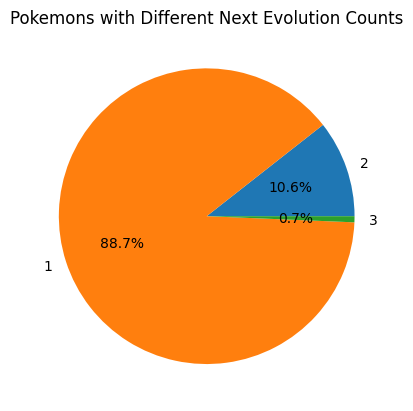

In [110]:

# Next evolution analysis
evolution_counts = df['Next Evolution'].str.count(',') + 1

# Counting the occurrences of each next evolution count
evolution_count_dict = {}
for count in evolution_counts:
    evolution_count_dict[count] = evolution_count_dict.get(count, 0) + 1

# Pie plot
labels = evolution_count_dict.keys()
counts = evolution_count_dict.values()

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pokemons with Different Next Evolution Counts')

plt.show()


In [111]:
# In total pokemon data there is only 0.7% pokemons are more than 2

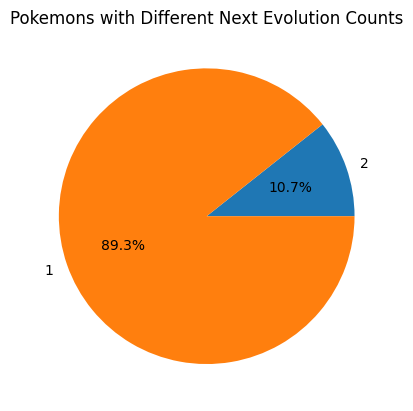

In [112]:

# Next evolution analysis
evolution_counts = less_than_2_evolutions['Next Evolution'].str.count(',') + 1

# Counting the occurrences of each next evolution count
evolution_count_dict = {}
for count in evolution_counts:
    evolution_count_dict[count] = evolution_count_dict.get(count, 0) + 1

# Pie plot
labels = evolution_count_dict.keys()
counts = evolution_count_dict.values()

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pokemons with Different Next Evolution Counts')

plt.show()

In [113]:
# Get all Pokemons whose spawn time is less than 300 seconds
print("5) Get all Pokemons whose spawn time is less than 300 seconds")
spawn_time_threshold = 300
df['Spawn Time'] = pd.to_datetime(df['Spawn Time'], format='%H:%M', errors='coerce')
spawn_time_less_than_threshold = df[["Name","Spawn Time"]][df['Spawn Time'].dt.minute*60 + df['Spawn Time'].dt.second  < spawn_time_threshold]
print("Pokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_threshold)
print("Here {} Pokemons with spawn time less than 300 seconds\n".format(len(spawn_time_less_than_threshold["Name"])))

5) Get all Pokemons whose spawn time is less than 300 seconds
Pokemons with spawn time less than 300 seconds:
           Name          Spawn Time
0     Bulbasaur 1900-01-01 20:00:00
1       Ivysaur 1900-01-01 07:00:00
4    Charmeleon 1900-01-01 19:00:00
7     Wartortle 1900-01-01 07:02:00
24      Pikachu 1900-01-01 04:00:00
32     Nidorino 1900-01-01 09:02:00
77     Rapidash 1900-01-01 04:00:00
80    Magnemite 1900-01-01 04:04:00
86      Dewgong 1900-01-01 06:04:00
135     Flareon 1900-01-01 07:02:00
138     Omastar 1900-01-01 05:04:00
Here 11 Pokemons with spawn time less than 300 seconds



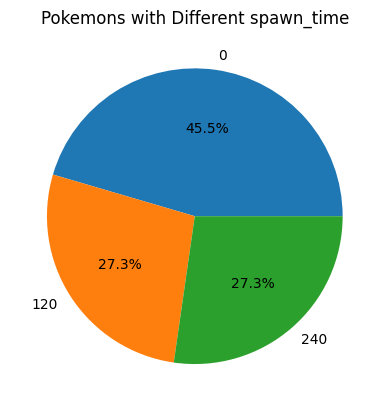

In [114]:

# Spawn time analysis
spawn_time = spawn_time_less_than_threshold['Spawn Time'].dt.minute * 60 + spawn_time_less_than_threshold['Spawn Time'].dt.second

# Counting the occurrences of each next evolution count
spawn_time_dict = {}
for count in spawn_time:
    spawn_time_dict[count] = spawn_time_dict.get(count, 0) + 1

# Pie plot
labels = spawn_time_dict.keys()
counts = spawn_time_dict.values()

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pokemons with Different spawn_time')

plt.show()

Text(0.5, 1.0, 'Pokemons with spawn time less than 300 seconds')

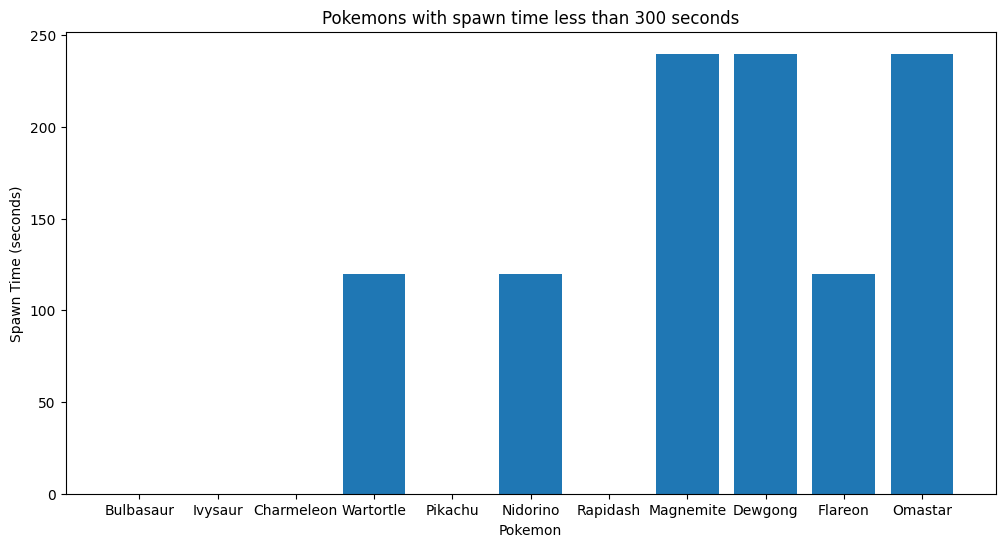

In [115]:
plt.figure(figsize=(12, 6))
plt.bar(spawn_time_less_than_threshold['Name'], spawn_time_less_than_threshold['Spawn Time'].dt.minute * 60 + spawn_time_less_than_threshold['Spawn Time'].dt.second)
plt.xlabel('Pokemon')
plt.ylabel('Spawn Time (seconds)')
plt.title('Pokemons with spawn time less than 300 seconds')

In [116]:
# Get all Pokemon who have more than two types of capabilities
print("6) Get all Pokemon who have more than two types of capabilities")
more_than_2_types = df[["Name","Type"]][df['Type'].str.count(',') > 1]
print("Pokemons with more than 2 types of capabilities:")
print(more_than_2_types)
print("Here {} Pokemons with more than 2 types of capabilities  ".format(len(more_than_2_types["Name"])))

6) Get all Pokemon who have more than two types of capabilities
Pokemons with more than 2 types of capabilities:
Empty DataFrame
Columns: [Name, Type]
Index: []
Here 0 Pokemons with more than 2 types of capabilities  


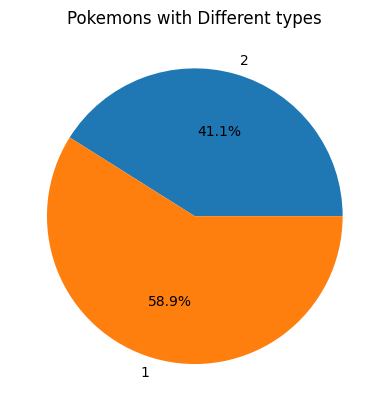

In [117]:
# types of capabilities
types = df['Type'].str.count(',') + 1

# Counting the occurrences of each next evolution count
types_dict = {}
for count in types:
    types_dict[count] = types_dict.get(count, 0) + 1

# Pie plot
labels = types_dict.keys()
counts = types_dict.values()

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pokemons with Different types')

plt.show()

In [118]:
# In Above plot we can clearly see that there is no Pokemons with more than 2 types of capabilities